In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pulse_gen as pg
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ntemp=pg.exp_former(np.arange(1000), .0872, .465, .0734  , .0575, .054  , .00602)
ntemp=ntemp/np.sum(ntemp)
gtemp=pg.exp_former(np.arange(1000), .0872, .465, .0734/2, .0575, .054/5, .00602)
gtemp=gtemp/np.sum(gtemp)

sipm_dark=pg.f_wav('smooth_pulse.txt').read()
sipm_dark=sipm_dark[3:]-sipm_dark[-1]
sfilt=pg.ff.prony_shank(sipm_dark,4,4,sForm=10)

pgamma=pg.pulse(gtemp,[500],60,sfilt)
pneutron=pg.pulse(ntemp,[500],60,sfilt)

<function matplotlib.pyplot.show>

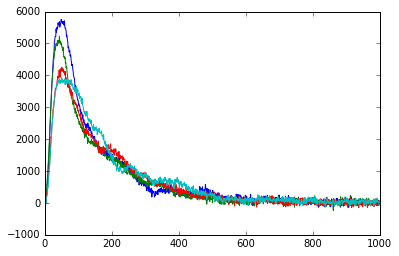

In [5]:
gp=pgamma.getPulses(2)
nd=pneutron.getPulses(2)
plt.plot(gp)
plt.plot(nd)
plt.show


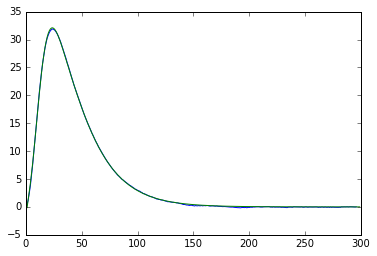

In [6]:
plt.plot(sipm_dark)
plt.plot(sfilt.filter(np.asarray([1]+[0]*299)))

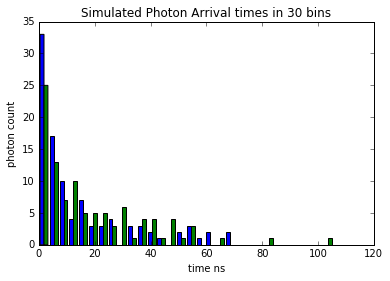

In [11]:
dispg=pg.dec_pulse([4,22],[.25,.75],[100],0,sfilt,1,500)
photons=dispg.photons(2)

_=plt.hist(photons,bins=30)
plt.xlabel('time ns')
plt.ylabel('photon count')
plt.title('Simulated Photon Arrival times in 30 bins')

---
dec_pulse generates the signal with correct statistical modelling of the photons individually bucketing into singlet and triplet pulses. The api call is dec_pulse(\[time list\],\[ratio list\],\[energy list\],thermal noise,photon response,time resolution,number of steps).

---
The above is demonstration of the photon arrival time code. This is done using a naive triplet to singlet ratio of 3 to 1 and the liquid xenon time constants.


In [ ]:
sd=60/(2*np.sqrt(2*np.log(10)))
sdr=int(sd)
txs=range(-3*sdr,3*sdr)
ph=1
sigy=ph*

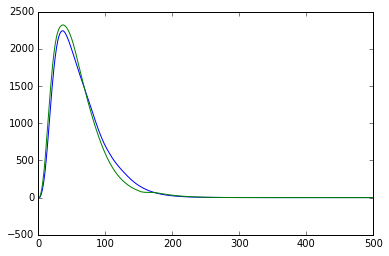

In [16]:

test_pulses=dispg.getPulses(2)
_=plt.plot(np.asarray(test_pulses).T)